# Forecast the No. of Monthly beer sales from 2017 to 2019 january.

## Author- Rohan Kulkarni

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
beer=pd.read_csv(r'E:\Imarticus\11.TIME-SERIES\BeerWineLiquor.csv')

In [4]:
beer

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822
...,...,...
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130


In [5]:
beer.isnull().sum()

date    0
beer    0
dtype: int64

In [6]:
beer.date=pd.to_datetime(beer.date,infer_datetime_format=True)


In [7]:
beer=beer.set_index(['date'])

In [8]:
beer

,beer
date,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822
...,...
2018-08-01,4898
2018-09-01,4598
2018-10-01,4737


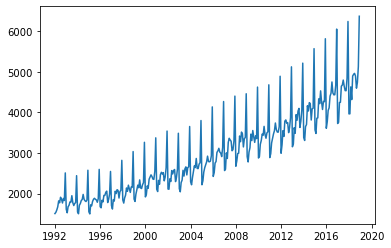

In [9]:
plt.plot(beer)

In [10]:
beer_log=np.log(beer)

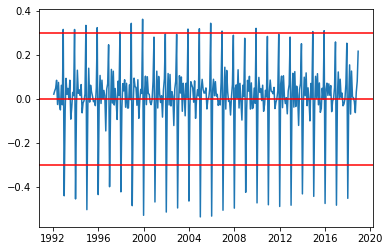

In [11]:
plt.plot(beer_log.diff())
plt.axhline(y=.30,color='r')
plt.axhline(y=0,color='r')
plt.axhline(y=-.30,color='r')

In [12]:
train=beer_log.iloc[:300,]
test=beer_log.iloc[300:,]

# MODEL

In [13]:
import pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [14]:
auto_arima(beer_log['beer'],seasonal=True,m=12)

ARIMA(order=(3, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [15]:
model_sarima=SARIMAX(train['beer'],order=(3, 0, 0),seasonal_order=(0, 1, 1, 12))

C:\Users\_RoXstaR_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\_RoXstaR_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [16]:
result=model_sarima.fit()

C:\Users\_RoXstaR_\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [17]:
predict_beer=result.predict(start=300,end=324)

In [18]:
predict_beer

2017-01-01    8.255846
2017-02-01    8.269793
2017-03-01    8.351724
2017-04-01    8.364854
2017-05-01    8.454795
2017-06-01    8.440911
2017-07-01    8.494334
2017-08-01    8.460711
2017-09-01    8.405843
2017-10-01    8.439445
2017-11-01    8.470278
2017-12-01    8.758651
2018-01-01    8.290842
2018-02-01    8.302377
2018-03-01    8.394289
2018-04-01    8.399713
2018-05-01    8.491031
2018-06-01    8.479836
2018-07-01    8.529996
2018-08-01    8.497676
2018-09-01    8.443219
2018-10-01    8.475610
2018-11-01    8.507135
2018-12-01    8.795375
2019-01-01    8.327159
Freq: MS, dtype: float64

In [19]:
np.exp(predict_beer)

2017-01-01    3850.068564
2017-02-01    3904.141903
2017-03-01    4237.481187
2017-04-01    4293.485327
2017-05-01    4697.542952
2017-06-01    4632.774051
2017-07-01    4886.999371
2017-08-01    4725.417546
2017-09-01    4473.128537
2017-10-01    4625.988986
2017-11-01    4770.842219
2017-12-01    6365.518314
2018-01-01    3987.191696
2018-02-01    4033.450495
2018-03-01    4421.741364
2018-04-01    4445.791399
2018-05-01    4870.886949
2018-06-01    4816.660868
2018-07-01    5064.423230
2018-08-01    4903.358613
2018-09-01    4643.477034
2018-10-01    4796.347182
2018-11-01    4949.962673
2018-12-01    6603.634728
2019-01-01    4134.654256
Freq: MS, dtype: float64

In [20]:
error= np.exp(test['beer'])- np.exp(predict_beer)

In [21]:
error

2017-01-01   -122.068564
2017-02-01   -145.141903
2017-03-01      9.518813
2017-04-01    -42.485327
2017-05-01    -50.542952
2017-06-01     43.225949
2017-07-01    -88.999371
2017-08-01    -78.417546
2017-09-01     64.871463
2017-10-01    -89.988986
2017-11-01     75.157781
2017-12-01   -124.518314
2018-01-01    -22.191696
2018-02-01    -66.450495
2018-03-01    207.258636
2018-04-01   -128.791399
2018-05-01     26.113051
2018-06-01    122.339132
2018-07-01   -101.423230
2018-08-01     -5.358613
2018-09-01    -45.477034
2018-10-01    -59.347182
2018-11-01    180.037327
2018-12-01   -233.634728
2019-01-01           NaN
dtype: float64

In [22]:
MSE=np.mean(np.square(error))
MSE

11367.505699661115

In [23]:
RMSE=np.sqrt(MSE)
RMSE

106.61850542781546